In [4]:
import numpy as np
from matplotlib import pyplot as plt
import h5py
import glob
from scipy.signal import welch, tukey
from scipy.interpolate import interp1d
plt.ion()

## Define fuctions to read the templates and data

In [5]:
def read_template(filename):
    dataFile=h5py.File(filename,'r')
    template=dataFile['template']
    th=template[0]
    tl=template[1]
    return th,tl

In [6]:
def read_file(filename):
    dataFile=h5py.File(filename,'r')
    dqInfo = dataFile['quality']['simple']
    qmask=dqInfo['DQmask'][...]

    meta=dataFile['meta']
    #gpsStart=meta['GPSstart'].value
    gpsStart=meta['GPSstart'][()]
    #print meta.keys()
    #utc=meta['UTCstart'].value
    utc=meta['UTCstart'][()]
    #duration=meta['Duration'].value
    duration=meta['Duration'][()]
    #strain=dataFile['strain']['Strain'].value
    strain=dataFile['strain']['Strain'][()]
    dt=(1.0*duration)/len(strain)

    dataFile.close()
    return strain,dt,utc

## Introduce the files and templates

In [7]:
fnameh1='H-H1_LOSC_4_V2-1126259446-32.hdf5'
print('reading file ',fnameh1)
strainh1,dth1,utch1=read_file(fnameh1)

fnamel1='L-L1_LOSC_4_V2-1126259446-32.hdf5'
print('reading file ',fnamel1)
strainl1,dtl1,utcl1=read_file(fnamel1)

template_name1='GW150914_4_template.hdf5'
th1,tl1=read_template(template_name1)
print('reading template ',template_name1)

reading file  H-H1_LOSC_4_V2-1126259446-32.hdf5
reading file  L-L1_LOSC_4_V2-1126259446-32.hdf5
reading template  GW150914_4_template.hdf5


In [8]:
fnameh2='H-H1_LOSC_4_V2-1128678884-32.hdf5'
print('reading file ',fnameh2)
strainh2,dth2,utch2=read_file(fnameh2)

fnamel2='L-L1_LOSC_4_V2-1128678884-32.hdf5'
print('reading file ',fnamel2)
strainl2,dtl2,utcl2=read_file(fnamel2)

template_name2='LVT151012_4_template.hdf5'
th2,tl2=read_template(template_name2)
print('reading template ',template_name2)

reading file  H-H1_LOSC_4_V2-1128678884-32.hdf5
reading file  L-L1_LOSC_4_V2-1128678884-32.hdf5
reading template  LVT151012_4_template.hdf5


In [9]:
fnameh3='H-H1_LOSC_4_V2-1135136334-32.hdf5'
print('reading file ',fnameh3)
strainh3,dth3,utch3=read_file(fnameh3)

fnamel3='L-L1_LOSC_4_V2-1135136334-32.hdf5'
print('reading file ',fnamel3)
strainl3,dtl3,utcl3=read_file(fnamel3)

template_name3='GW151226_4_template.hdf5'
th3,tl3=read_template(template_name3)
print('reading template ',template_name3)

reading file  H-H1_LOSC_4_V2-1135136334-32.hdf5
reading file  L-L1_LOSC_4_V2-1135136334-32.hdf5
reading template  GW151226_4_template.hdf5


In [10]:
fnameh4='H-H1_LOSC_4_V1-1167559920-32.hdf5'
print('reading file ',fnameh4)
strainh4,dth4,utch4=read_file(fnameh4)

fnamel4='L-L1_LOSC_4_V1-1167559920-32.hdf5'
print('reading file ',fnamel4)
strainl4,dtl4,utcl4=read_file(fnamel4)

template_name4='GW170104_4_template.hdf5'
th4,tl4=read_template(template_name4)
print('reading template ',template_name4)

reading file  H-H1_LOSC_4_V1-1167559920-32.hdf5
reading file  L-L1_LOSC_4_V1-1167559920-32.hdf5
reading template  GW170104_4_template.hdf5


## Plotting the data and template

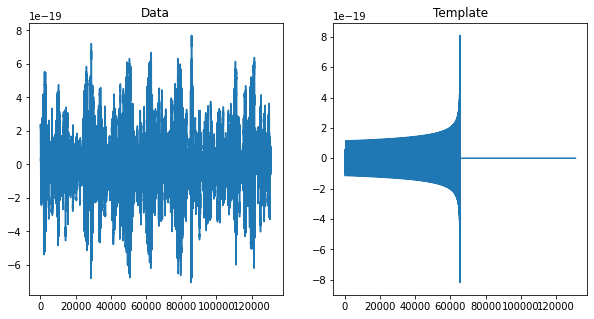

In [11]:
timeh1 = np.linspace(1, len(strainh1), len(strainh1))
template_timeh1 = np.linspace(1, len(th1), len(th1))

fig, axes= plt.subplots(1,2)
fig.set_size_inches(10,5)
axes[0].plot(timeh1, strainh1)
axes[0].set_title('Data')

axes[1].plot(template_timeh1, th1)
axes[1].set_title('Template')

plt.show()

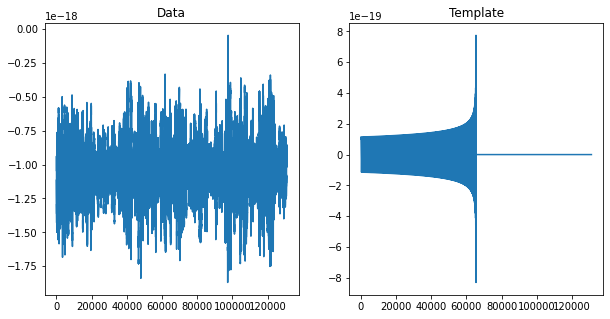

In [12]:
timel1 = np.linspace(1, len(strainl1), len(strainl1))
template_timel1 = np.linspace(1, len(tl1), len(tl1))

fig, axes= plt.subplots(1,2)
fig.set_size_inches(10,5)
axes[0].plot(timel1, strainl1)
axes[0].set_title('Data')

axes[1].plot(template_timel1, tl1)
axes[1].set_title('Template')

plt.show()

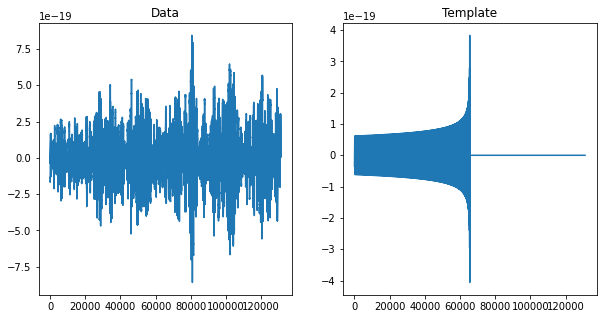

In [13]:
timeh2 = np.linspace(1, len(strainh2), len(strainh2))
template_timeh2 = np.linspace(1, len(th2), len(th2))

fig, axes= plt.subplots(1,2)
fig.set_size_inches(10,5)
axes[0].plot(timeh2, strainh2)
axes[0].set_title('Data')

axes[1].plot(template_timeh2, th2)
axes[1].set_title('Template')

plt.show()

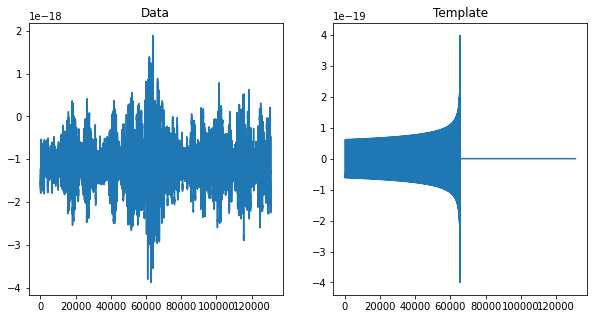

In [14]:
timel2 = np.linspace(1, len(strainl2), len(strainl2))
template_timel2 = np.linspace(1, len(tl2), len(tl2))

fig, axes= plt.subplots(1,2)
fig.set_size_inches(10,5)
axes[0].plot(timel2, strainl2)
axes[0].set_title('Data')

axes[1].plot(template_timel2, tl2)
axes[1].set_title('Template')

plt.show()

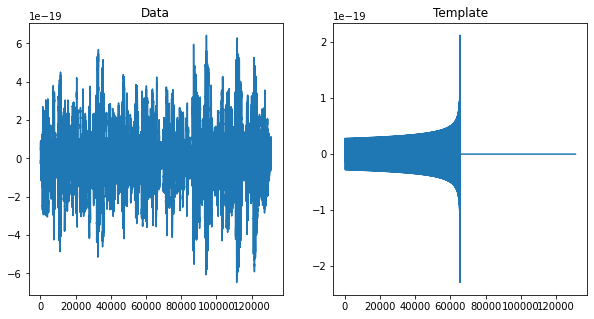

In [15]:
timeh3 = np.linspace(1, len(strainh3), len(strainh3))
template_timeh3 = np.linspace(1, len(th3), len(th3))

fig, axes= plt.subplots(1,2)
fig.set_size_inches(10,5)
axes[0].plot(timeh3, strainh3)
axes[0].set_title('Data')

axes[1].plot(template_timeh3, th3)
axes[1].set_title('Template')

plt.show()

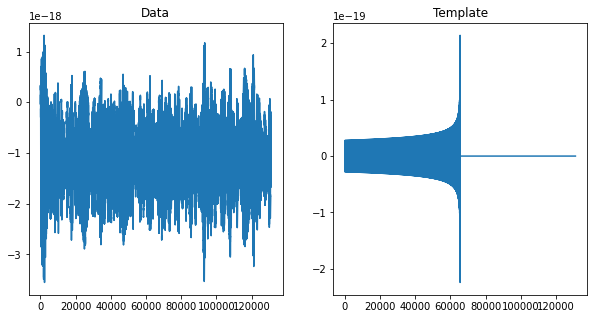

In [16]:
timel3 = np.linspace(1, len(strainl3), len(strainl3))
template_timel3 = np.linspace(1, len(tl3), len(tl3))

fig, axes= plt.subplots(1,2)
fig.set_size_inches(10,5)
axes[0].plot(timel3, strainl3)
axes[0].set_title('Data')

axes[1].plot(template_timel3, tl3)
axes[1].set_title('Template')

plt.show()

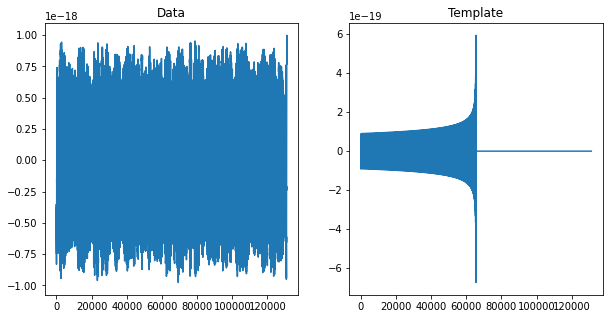

In [17]:
timeh4 = np.linspace(1, len(strainh4), len(strainh4))
template_timeh4 = np.linspace(1, len(th4), len(th4))

fig, axes= plt.subplots(1,2)
fig.set_size_inches(10,5)
axes[0].plot(timeh4, strainh4)
axes[0].set_title('Data')

axes[1].plot(template_timeh4, th4)
axes[1].set_title('Template')

plt.show()

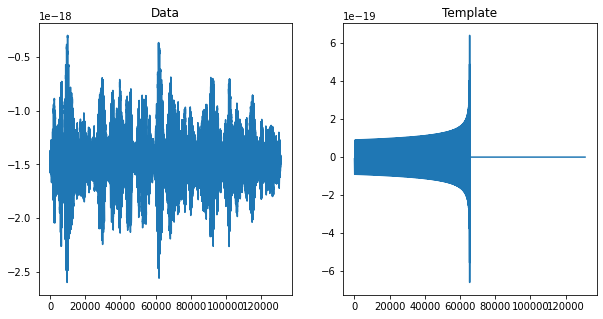

In [18]:
timel4 = np.linspace(1, len(strainl4), len(strainl4))
template_timel4 = np.linspace(1, len(tl4), len(tl4))

fig, axes= plt.subplots(1,2)
fig.set_size_inches(10,5)
axes[0].plot(timel4, strainl4)
axes[0].set_title('Data')

axes[1].plot(template_timel4, tl4)
axes[1].set_title('Template')

plt.show()

## Constructing the noise model

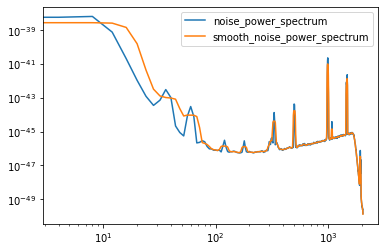

In [19]:
fsh1 = 1/dth1
n = 1024

#I choose the tukey window fuction which has this feature of 'flat top'!
freqsh1, noise_power_spectrumh1 = welch(strainh1, fs=fsh1, window=('tukey',len(strainh1)) , nperseg=n)


n_smooth = 5
smooth_noise_power_spectrumh1 = np.convolve(noise_power_spectrumh1, np.ones(n_smooth)/n_smooth , mode='same')

plt.figure()
plt.loglog(freqsh1, noise_power_spectrumh1, label='noise_power_spectrum')
plt.loglog(freqsh1, smooth_noise_power_spectrumh1, label='smooth_noise_power_spectrum')
plt.legend()
plt.show()

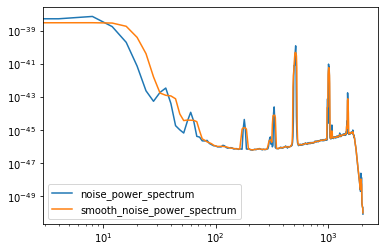

In [20]:
fsl1 = 1/dtl1
n = 1024

#I choose the tukey window fuction which has this feature of 'flat top'!
freqsl1, noise_power_spectruml1 = welch(strainl1, fs=fsl1, window=('tukey',len(strainl1)) , nperseg=n)


n_smooth = 5
smooth_noise_power_spectruml1 = np.convolve(noise_power_spectruml1, np.ones(n_smooth)/n_smooth , mode='same')

plt.figure()
plt.loglog(freqsl1, noise_power_spectruml1, label='noise_power_spectrum')
plt.loglog(freqsl1, smooth_noise_power_spectruml1, label='smooth_noise_power_spectrum')
plt.legend()
plt.show()

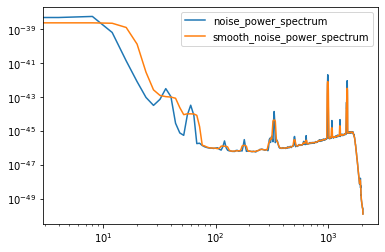

In [21]:
fsh2 = 1/dth2
n = 1024

#I choose the tukey window fuction which has this feature of 'flat top'!
freqsh2, noise_power_spectrumh2 = welch(strainh2, fs=fsh2, window=('tukey',len(strainh2)) , nperseg=n)


n_smooth = 5
smooth_noise_power_spectrumh2 = np.convolve(noise_power_spectrumh2, np.ones(n_smooth)/n_smooth , mode='same')

plt.figure()
plt.loglog(freqsh2, noise_power_spectrumh2, label='noise_power_spectrum')
plt.loglog(freqsh2, smooth_noise_power_spectrumh2, label='smooth_noise_power_spectrum')
plt.legend()
plt.show()

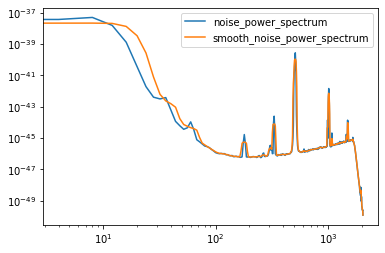

In [22]:
fsl2 = 1/dtl2
n = 1024

#I choose the tukey window fuction which has this feature of 'flat top'!
freqsl2, noise_power_spectruml2 = welch(strainl2, fs=fsl2, window=('tukey',len(strainl2)) , nperseg=n)


n_smooth = 5
smooth_noise_power_spectruml2 = np.convolve(noise_power_spectruml2, np.ones(n_smooth)/n_smooth , mode='same')

plt.figure()
plt.loglog(freqsl2, noise_power_spectruml2, label='noise_power_spectrum')
plt.loglog(freqsl2, smooth_noise_power_spectruml2, label='smooth_noise_power_spectrum')
plt.legend()
plt.show()

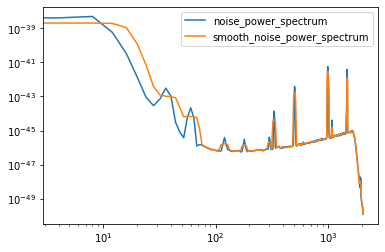

In [23]:
fsh3 = 1/dth3
n = 1024

#I choose the tukey window fuction which has this feature of 'flat top'!
freqsh3, noise_power_spectrumh3 = welch(strainh3, fs=fsh3, window=('tukey',len(strainh3)) , nperseg=n)


n_smooth = 5
smooth_noise_power_spectrumh3 = np.convolve(noise_power_spectrumh3, np.ones(n_smooth)/n_smooth , mode='same')

plt.figure()
plt.loglog(freqsh3, noise_power_spectrumh3, label='noise_power_spectrum')
plt.loglog(freqsh3, smooth_noise_power_spectrumh3, label='smooth_noise_power_spectrum')
plt.legend()
plt.show()

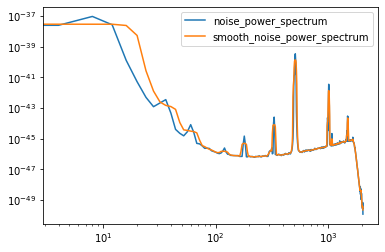

In [24]:
fsl3 = 1/dtl3
n = 1024

#I choose the tukey window fuction which has this feature of 'flat top'!
freqsl3, noise_power_spectruml3 = welch(strainl3, fs=fsl3, window=('tukey',len(strainl3)) , nperseg=n)


n_smooth = 5
smooth_noise_power_spectruml3 = np.convolve(noise_power_spectruml3, np.ones(n_smooth)/n_smooth , mode='same')

plt.figure()
plt.loglog(freqsl3, noise_power_spectruml3, label='noise_power_spectrum')
plt.loglog(freqsl3, smooth_noise_power_spectruml3, label='smooth_noise_power_spectrum')
plt.legend()
plt.show()

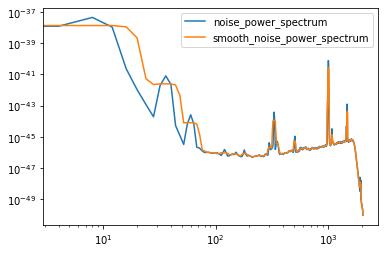

In [25]:
fsh4 = 1/dth4
n = 1024

#I choose the tukey window fuction which has this feature of 'flat top'!
freqsh4, noise_power_spectrumh4 = welch(strainh4, fs=fsh4, window=('tukey',len(strainh4)) , nperseg=n)


n_smooth = 5
smooth_noise_power_spectrumh4 = np.convolve(noise_power_spectrumh4, np.ones(n_smooth)/n_smooth , mode='same')

plt.figure()
plt.loglog(freqsh4, noise_power_spectrumh4, label='noise_power_spectrum')
plt.loglog(freqsh4, smooth_noise_power_spectrumh4, label='smooth_noise_power_spectrum')
plt.legend()
plt.show()

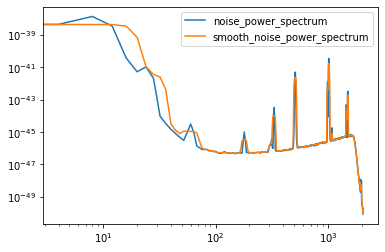

In [26]:
fsl4 = 1/dtl4
n = 1024

#I choose the tukey window fuction which has this feature of 'flat top'!
freqsl4, noise_power_spectruml4 = welch(strainl4, fs=fsl4, window=('tukey',len(strainl4)) , nperseg=n)


n_smooth = 5
smooth_noise_power_spectruml4 = np.convolve(noise_power_spectruml4, np.ones(n_smooth)/n_smooth , mode='same')

plt.figure()
plt.loglog(freqsl4, noise_power_spectruml4, label='noise_power_spectrum')
plt.loglog(freqsl4, smooth_noise_power_spectruml4, label='smooth_noise_power_spectrum')
plt.legend()
plt.show()

In [27]:
#doing the interpolation to adjust the length
noise_spectrum_intph1 = interp1d(freqsh1, smooth_noise_power_spectrumh1, kind='linear')
noise_spectrum_intpl1 = interp1d(freqsl1, smooth_noise_power_spectruml1, kind='linear')
noise_spectrum_intph2 = interp1d(freqsh2, smooth_noise_power_spectrumh2, kind='linear')
noise_spectrum_intpl2 = interp1d(freqsl2, smooth_noise_power_spectruml2, kind='linear')
noise_spectrum_intph3 = interp1d(freqsh3, smooth_noise_power_spectrumh3, kind='linear')
noise_spectrum_intpl3 = interp1d(freqsl3, smooth_noise_power_spectruml3, kind='linear')
noise_spectrum_intph4 = interp1d(freqsh4, smooth_noise_power_spectrumh4, kind='linear')
noise_spectrum_intpl4 = interp1d(freqsl4, smooth_noise_power_spectruml4, kind='linear')

## Whitening!

In [29]:
def white(time, dt, signal, noise_intp):
  fs = 1/dt
  spectr = np.fft.rfft(signal*np.hamming(len(signal)))
  freq = np.fft.rfftfreq(len(signal), dt)
  spectr = spectr/np.sqrt(noise_intp(np.abs(freq)))
  whitened_signal = np.fft.irfft(spectr)/np.hamming(len(signal))

  scaling = np.sqrt(np.mean(np.power(signal, 2)))/np.sqrt(np.mean(np.power(whitened_signal, 2)))
  return whitened_signal *scaling, spectr, freq

In [30]:
signal_whiteh1, signal_white_specth1, freqh1 = white(timeh1, dth1, strainh1, noise_spectrum_intph1)
ligo_whiteh1, ligo_white_spech1, freqh1= white(timeh1, dth1, th1, noise_spectrum_intph1)

In [31]:
signal_whitel1, signal_white_spectl1, freql1 = white(timel1, dtl1, strainl1, noise_spectrum_intpl1)
ligo_whitel1, ligo_white_specl1, freql1= white(timel1, dtl1, tl1, noise_spectrum_intpl1)

In [32]:
signal_whiteh2, signal_white_specth2, freqh2 = white(timeh2, dth2, strainh2, noise_spectrum_intph2)
ligo_whiteh2, ligo_white_spech2, freqh2= white(timeh2, dth2, th2, noise_spectrum_intph2)

In [33]:
signal_whitel2, signal_white_spectl2, freql2 = white(timel2, dtl2, strainl2, noise_spectrum_intpl2)
ligo_whitel2, ligo_white_specl2, freql2= white(timel2, dtl2, tl2, noise_spectrum_intpl2)

In [34]:
signal_whiteh3, signal_white_specth3, freqh3 = white(timeh3, dth3, strainh3, noise_spectrum_intph3)
ligo_whiteh3, ligo_white_spech3, freqh3= white(timeh3, dth3, th3, noise_spectrum_intph3)

In [35]:
signal_whitel3, signal_white_spectl3, freqhl3 = white(timel3, dtl3, strainl3, noise_spectrum_intpl3)
ligo_whitehl3, ligo_white_specl3, freql3= white(timel3, dtl3, tl3, noise_spectrum_intpl3)

In [36]:
signal_whiteh4, signal_white_specth4, freqh4 = white(timeh4, dth4, strainh4, noise_spectrum_intph4)
ligo_whiteh4, ligo_white_spech4, freqh4= white(timeh4, dth4, th4, noise_spectrum_intph4)

In [37]:
signal_whitel4, signal_white_spectl4, freql4 = white(timel4, dtl4, strainl4, noise_spectrum_intpl4)
ligo_whitel4, ligo_white_specl4, freql4= white(timel4, dtl4, tl4, noise_spectrum_intpl4)

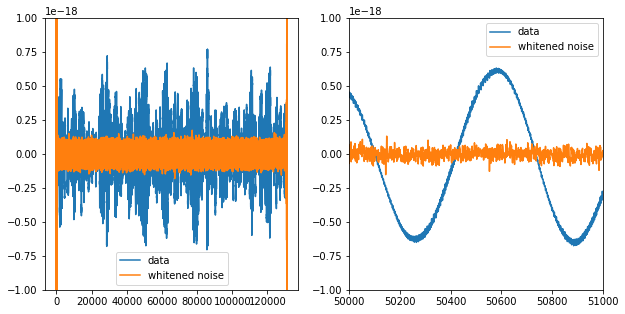

In [38]:
fig, axes= plt.subplots(1,2)
fig.set_size_inches(10,5)
axes[0].plot(timeh1, strainh1, label='data')
axes[0].plot(timeh1, signal_whiteh1, label='whitened noise')
axes[0].set_ylim(-0.1e-17,0.1e-17)
axes[0].legend()

axes[1].plot(timeh1, strainh1, label='data')
axes[1].plot(timeh1, signal_whiteh1, label='whitened noise')
axes[1].set_ylim(-0.1e-17,0.1e-17)
axes[1].set_xlim(5e4,5.1e4)
axes[1].legend()

plt.show()

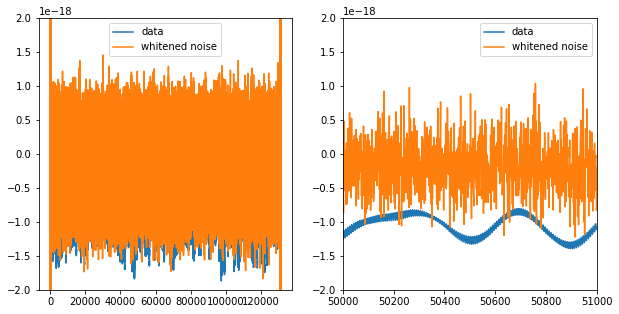

In [39]:
fig, axes= plt.subplots(1,2)
fig.set_size_inches(10,5)
axes[0].plot(timel1, strainl1, label='data')
axes[0].plot(timel1, signal_whitel1, label='whitened noise')
axes[0].set_ylim(-2e-18,2e-18)
axes[0].legend()

axes[1].plot(timel1, strainl1, label='data')
axes[1].plot(timel1, signal_whitel1, label='whitened noise')
axes[1].set_ylim(-2e-18,2e-18)
axes[1].set_xlim(5e4,5.1e4)
axes[1].legend()

plt.show()

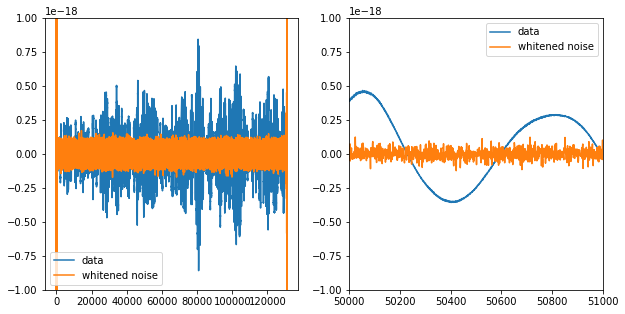

In [40]:
fig, axes= plt.subplots(1,2)
fig.set_size_inches(10,5)
axes[0].plot(timeh2, strainh2, label='data')
axes[0].plot(timeh2, signal_whiteh2, label='whitened noise')
axes[0].set_ylim(-0.1e-17,0.1e-17)
axes[0].legend()

axes[1].plot(timeh2, strainh2, label='data')
axes[1].plot(timeh2, signal_whiteh2, label='whitened noise')
axes[1].set_ylim(-0.1e-17,0.1e-17)
axes[1].set_xlim(5e4,5.1e4)
axes[1].legend()

plt.show()

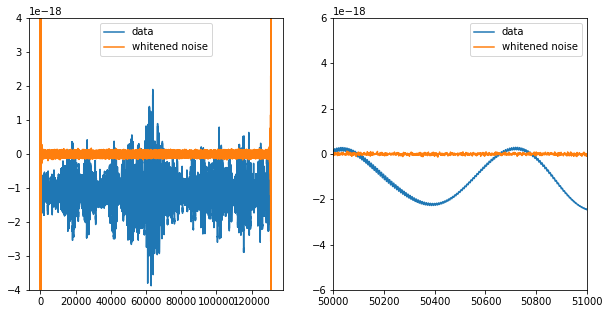

In [49]:
fig, axes= plt.subplots(1,2)
fig.set_size_inches(10,5)
axes[0].plot(timel2, strainl2, label='data')
axes[0].plot(timel2, signal_whitel2, label='whitened noise')
axes[0].set_ylim(-0.4e-17,0.4e-17)
axes[0].legend()

axes[1].plot(timel2, strainl2, label='data')
axes[1].plot(timel2, signal_whitel2, label='whitened noise')
axes[1].set_ylim(-0.6e-17,0.6e-17)
axes[1].set_xlim(5e4,5.1e4)
axes[1].legend()

plt.show()

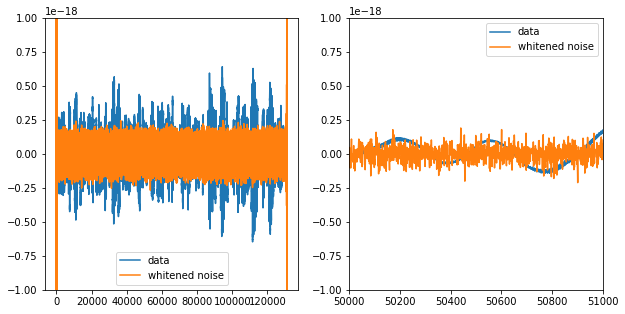

In [52]:
fig, axes= plt.subplots(1,2)
fig.set_size_inches(10,5)
axes[0].plot(timeh3, strainh3, label='data')
axes[0].plot(timeh3, signal_whiteh3, label='whitened noise')
axes[0].set_ylim(-0.1e-17,0.1e-17)
axes[0].legend()

axes[1].plot(timeh3, strainh3, label='data')
axes[1].plot(timeh3, signal_whiteh3, label='whitened noise')
axes[1].set_ylim(-0.1e-17,0.1e-17)
axes[1].set_xlim(5e4,5.1e4)
axes[1].legend()

plt.show()

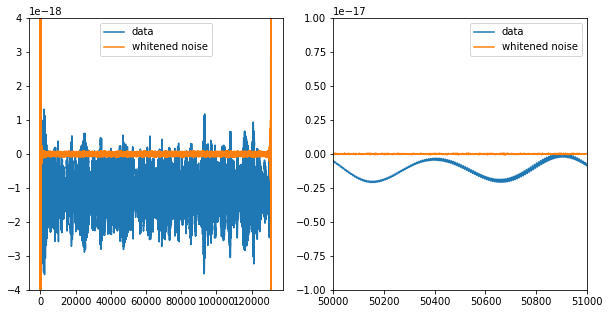

In [54]:
fig, axes= plt.subplots(1,2)
fig.set_size_inches(10,5)
axes[0].plot(timel3, strainl3, label='data')
axes[0].plot(timel3, signal_whitel3, label='whitened noise')
axes[0].set_ylim(-0.4e-17,0.4e-17)
axes[0].legend()

axes[1].plot(timel3, strainl3, label='data')
axes[1].plot(timel3, signal_whitel3, label='whitened noise')
axes[1].set_ylim(-1e-17,1e-17)
axes[1].set_xlim(5e4,5.1e4)
axes[1].legend()

plt.show()

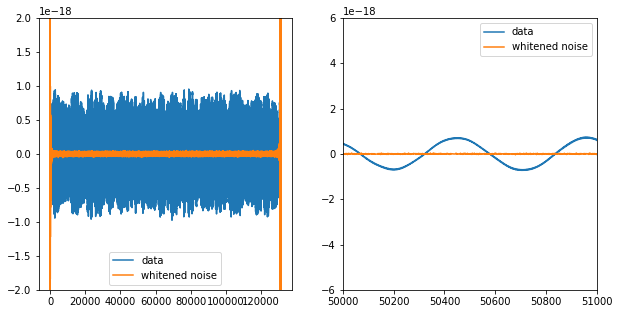

In [56]:
fig, axes= plt.subplots(1,2)
fig.set_size_inches(10,5)
axes[0].plot(timeh4, strainh4, label='data')
axes[0].plot(timeh4, signal_whiteh4, label='whitened noise')
axes[0].set_ylim(-0.2e-17,0.2e-17)
axes[0].legend()

axes[1].plot(timeh4, strainh4, label='data')
axes[1].plot(timeh4, signal_whiteh4, label='whitened noise')
axes[1].set_ylim(-0.6e-17,0.6e-17)
axes[1].set_xlim(5e4,5.1e4)
axes[1].legend()

plt.show()

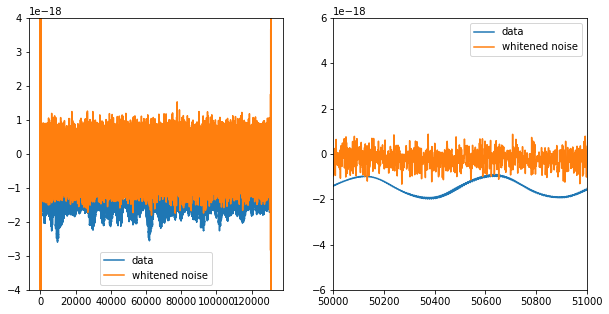

In [57]:
fig, axes= plt.subplots(1,2)
fig.set_size_inches(10,5)
axes[0].plot(timel4, strainl4, label='data')
axes[0].plot(timel4, signal_whitel4, label='whitened noise')
axes[0].set_ylim(-0.4e-17,0.4e-17)
axes[0].legend()

axes[1].plot(timel4, strainl4, label='data')
axes[1].plot(timel4, signal_whitel4, label='whitened noise')
axes[1].set_ylim(-0.6e-17,0.6e-17)
axes[1].set_xlim(5e4,5.1e4)
axes[1].legend()

plt.show()

As you can see, the noised that I have found seems to be whitened very well!

## Ploting the Whitened template

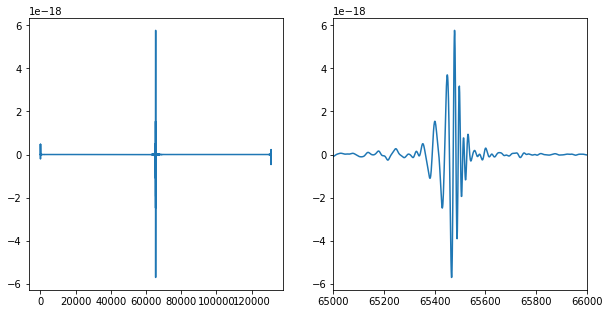

In [59]:
fig, axes= plt.subplots(1,2)
fig.set_size_inches(10,5)
axes[0].plot(template_timeh1, ligo_whiteh1)
axes[1].plot(template_timeh1, ligo_whiteh1)
axes[1].set_xlim(6.5e4,6.6e4)
plt.show()

In [ ]:
ligo_mf_spech1 = signal_white_specth1 * ligo_white_spech1.conjugate()
ligo_mfh1 = np.fft.irfft(ligo_mf_spech1)/np.hamming(len(strainh1))

In [ ]:
np.shape(ligo_mf)

In [ ]:
np.shape(time)

In [ ]:
max_value = max(th)
for i in range(0, len(th)):
  if th[i]==max_value:
    print('the max index is '+str(i))
    a = i


In [ ]:
fig, axes= plt.subplots(1,2)
fig.set_size_inches(10,5)

axes[0].plot(time, ligo_mf)

L_min = np.min(ligo_mf)
L_max = np.max(ligo_mf)

axes[0].vlines(a, ymin=L_min, ymax=L_max, color='r', linestyle='--')
plt.show()

In [ ]:
fig, axes= plt.subplots(1,2)
fig.set_size_inches(10,5)

axes[0].plot(time, ligo_mf)

L_min = np.min(ligo_mf)
L_max = np.max(ligo_mf)

axes[0].vlines(a, ymin=L_min, ymax=L_max, color='r', linestyle='--')
axes[0].set_xlim(6.4e4,6.6e4)
plt.show()